## Feature Selection Process

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Draft Cleaned Merged.csv")
df.head()

,time,depth,latitude,longitude,Tdir,Tper,Thgt,sdir,sper,shgt,...,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,Exist
0,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
1,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
2,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
3,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True
4,2022-06-30T00:00:00Z,0.0,17.0,114.5,198.0,6.024096,0.79,213.0,5.9,0.56,...,IMO9262223,ZCDO2,80.0,0.0,288.0,48.0,12.3,82.0,A,True


In [3]:
y = df["SOG"]
x = df.drop([ "VesselName", "IMO", "CallSign", "latitude", "longitude", "time", "BaseDateTime", "MMSI", "TransceiverClass", "Exist", "depth", "SOG"], axis = 1)

Calculating correlation analysis

In [4]:
x.corr(method ='pearson')

,Tdir,Tper,Thgt,sdir,sper,shgt,wdir,wper,whgt,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
Tdir,1.000000,-0.589622,0.119382,0.978535,-0.677285,0.044306,-0.492141,-0.235801,-0.195454,-0.225762,-0.197025,0.154603,-0.217324,0.389926,0.332826,0.316171,0.200863
Tper,-0.589622,1.000000,-0.387334,-0.572548,0.952481,0.160026,0.775737,-0.445201,-0.412771,0.216574,0.218014,-0.540190,0.069936,-0.364255,-0.390818,-0.227359,-0.474096
Thgt,0.119382,-0.387334,1.000000,0.081911,-0.334455,0.501495,-0.080480,0.513343,0.640324,-0.062158,0.095982,0.074257,-0.002245,0.135276,0.188229,0.166698,0.000217
sdir,0.978535,-0.572548,0.081911,1.000000,-0.703667,0.013769,-0.477775,-0.215541,-0.192404,-0.234715,-0.201361,0.169336,-0.217309,0.414874,0.350859,0.321110,0.210333
sper,-0.677285,0.952481,-0.334455,-0.703667,1.000000,0.116856,0.747511,-0.383485,-0.325933,0.260504,0.244863,-0.564341,0.098440,-0.440130,-0.437748,-0.263085,-0.494379
shgt,0.044306,0.160026,0.501495,0.013769,0.116856,1.000000,0.149569,-0.251638,-0.233309,-0.127112,0.246540,-0.256535,0.021386,-0.182951,-0.229706,-0.207798,-0.336916
wdir,-0.492141,0.775737,-0.080480,-0.477775,0.747511,0.149569,1.000000,-0.259989,-0.184262,0.214610,0.222309,-0.407728,0.050309,-0.284807,-0.298036,-0.207754,-0.325716
wper,-0.235801,-0.445201,0.513343,-0.215541,-0.383485,-0.251638,-0.259989,1.000000,0.926060,0.026785,-0.073457,0.432633,0.113145,0.247737,0.327391,0.233567,0.335642
whgt,-0.195454,-0.412771,0.640324,-0.192404,-0.325933,-0.233309,-0.184262,0.926060,1.000000,0.066662,-0.051669,0.328878,0.069337,0.255718,0.358514,0.312791,0.251950
COG,-0.225762,0.216574,-0.062158,-0.234715,0.260504,-0.127112,0.214610,0.026785,0.066662,1.000000,0.380699,-0.288188,-0.022012,-0.162959,-0.106018,0.025633,-0.353049


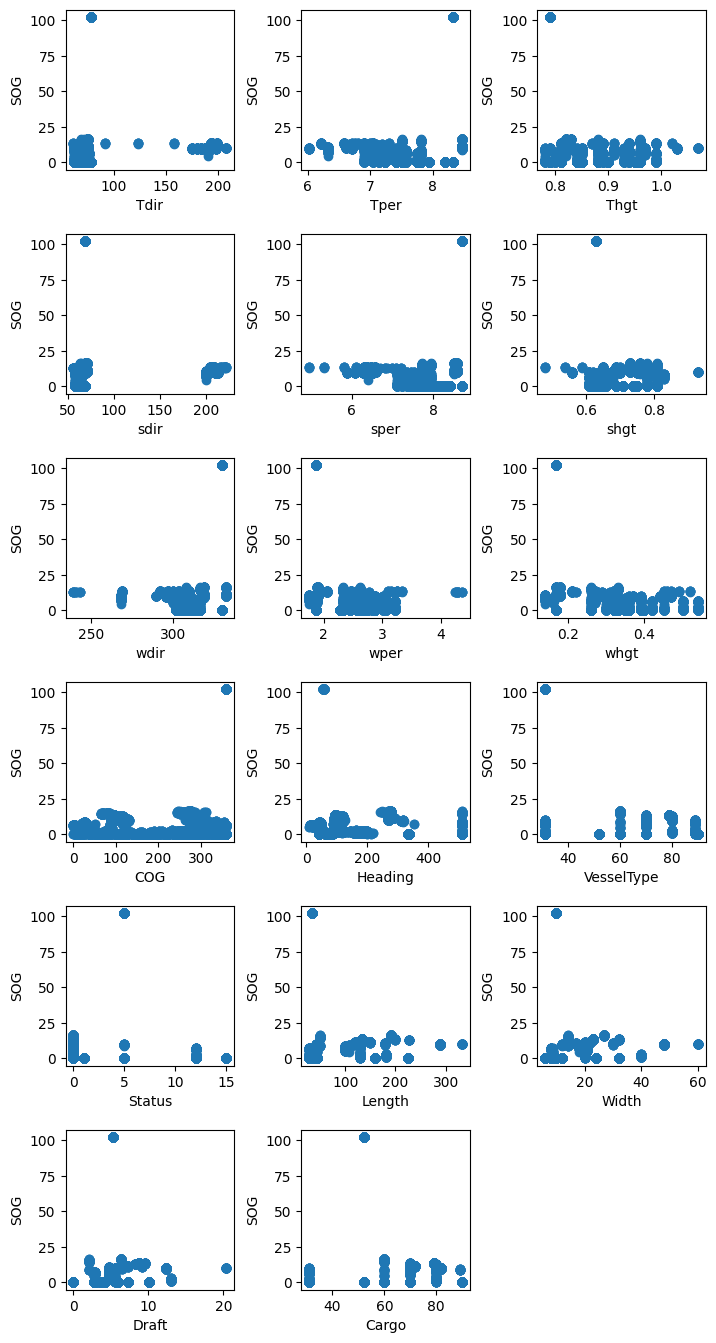

In [36]:
plt.figure(figsize=(8, 16))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i, col in enumerate(x.columns):
    plt.subplot(6, 3, i + 1)
    tempX = x[col]
    plt.scatter(tempX, y)
    plt.xlabel(col)
    plt.ylabel("SOG")
plt.show()

C:\Users\aajin\AppData\Local\Temp\ipykernel_12788\4004836846.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(method ='pearson'), cmap="Purples")


Text(0.5, 1.0, 'Correlation')

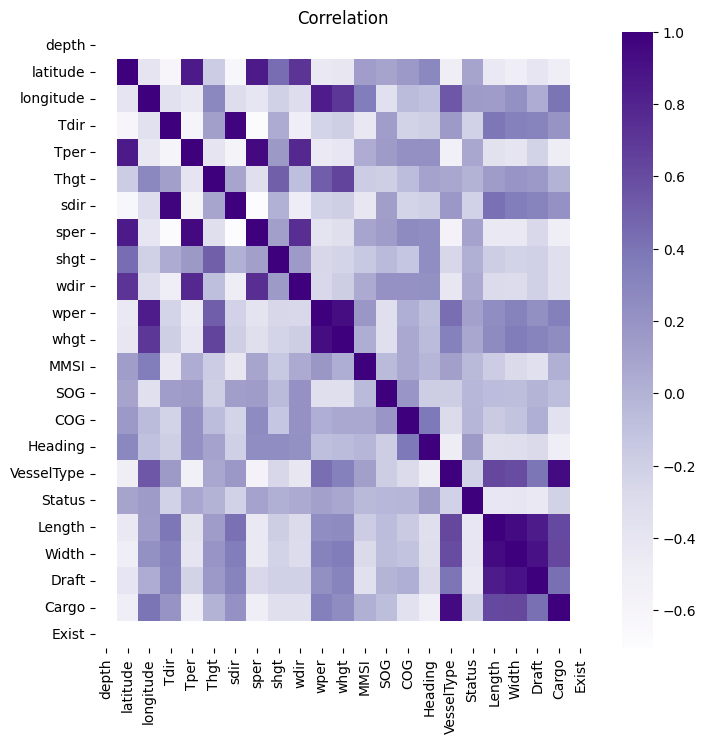

In [6]:
# using heatmap to find correlation
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df.corr(method ='pearson'), cmap="Purples")
heatmap.set_title("Correlation")

In [8]:
df.corr(method ='pearson').sort_values(["SOG"], ascending=False)[["SOG"]]

C:\Users\aajin\AppData\Local\Temp\ipykernel_12788\2471618673.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson').sort_values(["SOG"], ascending=False)[["SOG"]]


,SOG
SOG,1.000000
wdir,0.212030
COG,0.186954
Tper,0.146561
sper,0.135540
Tdir,0.130290
sdir,0.122745
latitude,0.090704
Draft,-0.006700
Status,-0.026052


Selected attributes that relate to our problem in question =>  `wdir` | `Tper` | `sper` | `Tdir` | `sdir` | `Length` | `Width`